# Практикум по СВМ

# Орехов Роман 471а. Вариант 5 (A1, FK2).

## A1. Метод факторизации плотных матриц (LAPACK) 

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mplt
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, show
%matplotlib inline

In [22]:
# Таблица
frame = pd.DataFrame({
    'Init time' : [0.011556, 0.035559, 0.223061, 1.763390],
    'Solve time' : [0.000180, 0.000246, 0.001182, 0.004783]
})
frame.index = [250, 500, 1000, 2000]
frame.index.name = 'Порядок'
frame

,Init time,Solve time
Порядок,,
250,0.011556,0.000180
500,0.035559,0.000246
1000,0.223061,0.001182
2000,1.763390,0.004783


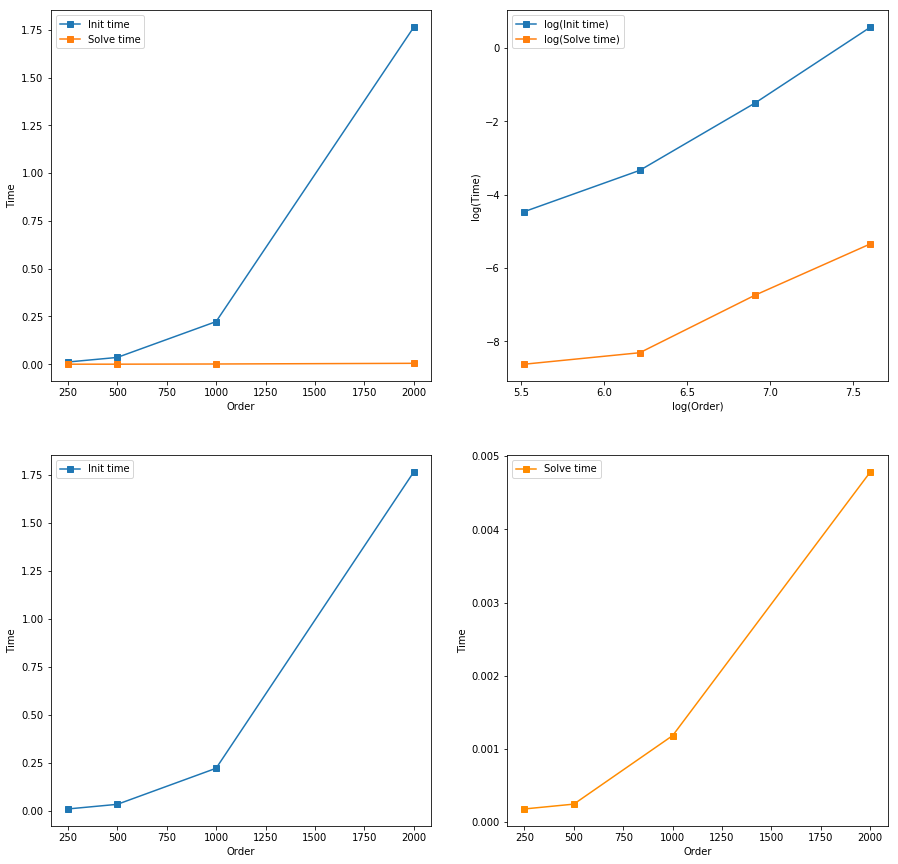

In [23]:
# На одном графике
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(221)
plt.plot(frame.index, frame['Init time'], marker = 's')
plt.plot(frame.index, frame['Solve time'], marker = 's')
plt.ylabel("Time")
plt.xlabel('Order')
plt.legend()

# log на одном графике
ax = fig.add_subplot(222)
plt.plot(np.log(frame.index), np.log(frame['Init time']), marker = 's', label = 'log(Init time)' )
plt.plot(np.log(frame.index), np.log(frame['Solve time']), marker = 's', label = 'log(Solve time)' )
plt.ylabel("log(Time)")
plt.xlabel('log(Order)')
plt.legend()

# Init time
ax = fig.add_subplot(223)
plt.plot(frame.index, frame['Init time'], marker = 's')
plt.ylabel("Time")
plt.xlabel('Order')
plt.legend()

# Solve time
ax = fig.add_subplot(224)
plt.plot(frame.index, frame['Solve time'], marker = 's', c = 'darkorange')
plt.ylabel("Time")
plt.xlabel('Order')
plt.legend()

plt.show()

In [24]:
# Расчет наклона логарифмических графиоков
dy_init = np.log(frame['Init time'][2000]) - np.log(frame['Init time'][500])
dy_solve = np.log(frame['Solve time'][2000]) - np.log(frame['Solve time'][500])
dx = np.log(frame.index)[3] - np.log(frame.index)[1]
incline_init = dy_init / dx
incline_solve = dy_solve / dx
print 'incline_init = ', incline_init  
print 'incline_solve = ', incline_solve

incline_init =  2.81599651019
incline_solve =  2.14059278532


 Наклон прямой части логарифмического графика инициализации $\approx 3$, а решения $\approx 2$. Можно сделать вывод, что арифметическая сложность LU разложения $= O(n^3)$, а сложность решения LU-матрицы $= O(n^2)$.

## FK2. Метод бисопряженных градиентов (SPARSKIT2). Переобуславливатель ILUT (SPARSKIT2)

In [106]:
# Таблица
frame = pd.DataFrame({
    'matrix' : ['1.dat']*6 + ['2.dat']*6 + ['3.dat']*6 + ['4.dat']*6,
    'n' : [4127]*6 + [16527]*6 + [66159]*6 + [264751]*6,
    'lfil' : ([50]*3 + [20, 40, 80])*4,
    'droptol' : ([1.0/10, 1.0/100, 1.0/1000] + [1.0/100]*3)*4,
    'iter number' : [248, 96, 56, 124, 100, 96, 420, 156, 92, 204, 160, 156, 628, 264, 160, 308, 272, 248, 972, 396, 244, 484, 400, 392],
    'ILUT time' : [0.002169, 0.039689, 0.140022, 0.024045, 0.036053, 0.041686, 0.007901, 0.1756, 0.683702, 0.096775, 0.155646, 0.187992, 0.028714, 0.775717, 3.177991, 0.398570, 0.681665, 0.840606, 0.117760, 3.201898, 13.363418, 1.646466, 2.820549, 3.494789],
    'Iter time' : [0.021271, 0.020523, 0.018417, 0.019188, 0.020394, 0.02177, 0.147170, 0.174601, 0.162534, 0.152, 0.166661, 0.179946, 0.993978, 1.405461, 1.352089, 1.059007, 1.407449, 1.415574, 7.541214 ,10.047520, 9.268132, 7.230927, 9.513701, 11.513954]
})
frame = frame[['matrix', 'n', 'lfil', 'droptol', 'iter number', 'ILUT time', 'Iter time']]
frame

,matrix,n,lfil,droptol,iter number,ILUT time,Iter time
0,1.dat,4127,50,0.100,248,0.002169,0.021271
1,1.dat,4127,50,0.010,96,0.039689,0.020523
2,1.dat,4127,50,0.001,56,0.140022,0.018417
3,1.dat,4127,20,0.010,124,0.024045,0.019188
4,1.dat,4127,40,0.010,100,0.036053,0.020394
5,1.dat,4127,80,0.010,96,0.041686,0.021770
6,2.dat,16527,50,0.100,420,0.007901,0.147170
7,2.dat,16527,50,0.010,156,0.175600,0.174601
8,2.dat,16527,50,0.001,92,0.683702,0.162534
9,2.dat,16527,20,0.010,204,0.096775,0.152000


Размеры матриц: 4127, 16527, 66159, 264751

In [63]:
n = [4127, 16527, 66159, 264751]

Графики зависимjсти времени от размеров матрицы, сгруппированые по значениям параметров droptol и lfil:

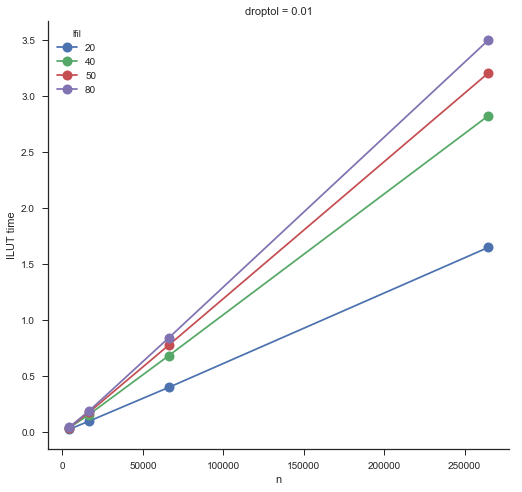

In [114]:
sns.set(style="ticks")
grid = sns.FacetGrid(frame.loc[frame['droptol'] == 0.01], col="droptol", margin_titles=True,sharex=False, sharey=False, hue="lfil", 
                    col_wrap=2, size=7, legend_out=False)
                    #hue_order=["TB", "TB+HIV"]) 

# Draw a line plot to show the trajectory of each random walk 
grid = (grid.map(plt.plot, "n", "ILUT time", marker="o", ms=10) 
.add_legend())

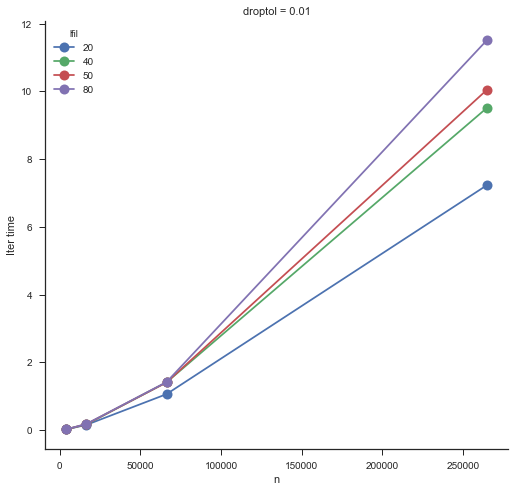

In [115]:
sns.set(style="ticks")
grid = sns.FacetGrid(frame.loc[frame['droptol'] == 0.01], col="droptol", margin_titles=True,sharex=False, sharey=False, hue="lfil", 
                    col_wrap=2, size=7, legend_out=False)
                    #hue_order=["TB", "TB+HIV"]) 

# Draw a line plot to show the trajectory of each random walk 
grid = (grid.map(plt.plot, "n", "Iter time", marker="o", ms=10) 
.add_legend())

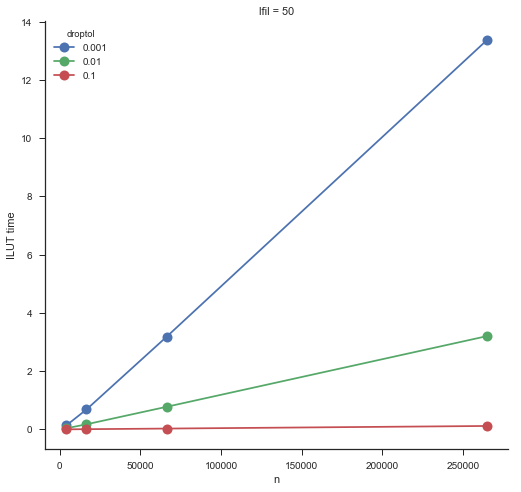

In [116]:
sns.set(style="ticks")
grid = sns.FacetGrid(frame.loc[frame['lfil'] == 50], col="lfil", margin_titles=True,sharex=False, sharey=False, hue="droptol", 
                    col_wrap=2, size=7, legend_out=False)
                    #hue_order=["TB", "TB+HIV"]) 

# Draw a line plot to show the trajectory of each random walk 
grid = (grid.map(plt.plot, "n", "ILUT time", marker="o", ms=10) 
.add_legend())

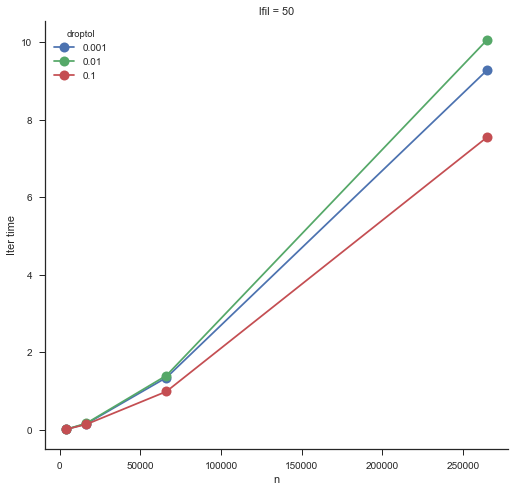

In [117]:
sns.set(style="ticks")
grid = sns.FacetGrid(frame.loc[frame['lfil'] == 50], col="lfil", margin_titles=True,sharex=False, sharey=False, hue="droptol", 
                    col_wrap=2, size=7, legend_out=False)
                    #hue_order=["TB", "TB+HIV"]) 

# Draw a line plot to show the trajectory of each random walk 
grid = (grid.map(plt.plot, "n", "Iter time", marker="o", ms=10) 
.add_legend())